# Linearly fitting points
In this notebook we will take buoy points
and infer whih walls they belong to.

In [1]:
import numpy as np, matplotlib.pyplot as plt
from itertools import chain, combinations

In [2]:
# ground truth data
walls = np.load('walls.npy')
print(walls)

# given data
points = np.vstack(walls)
print(points)

[[[ -5.06808815 -13.20282101   0.        ]
  [ -7.77966577  -7.11251796   0.        ]
  [-10.49124339  -1.02221491   0.        ]
  [-13.20282101   5.06808815   0.        ]]

 [[  1.02221491 -10.49124339   0.        ]
  [ -1.68936272  -4.40094034   0.        ]
  [ -4.40094034   1.68936272   0.        ]
  [ -7.11251796   7.77966577   0.        ]]

 [[  7.11251796  -7.77966577   0.        ]
  [  4.40094034  -1.68936272   0.        ]
  [  1.68936272   4.40094034   0.        ]
  [ -1.02221491  10.49124339   0.        ]]

 [[ 13.20282101  -5.06808815   0.        ]
  [ 10.49124339   1.02221491   0.        ]
  [  7.77966577   7.11251796   0.        ]
  [  5.06808815  13.20282101   0.        ]]]
[[ -5.06808815 -13.20282101   0.        ]
 [ -7.77966577  -7.11251796   0.        ]
 [-10.49124339  -1.02221491   0.        ]
 [-13.20282101   5.06808815   0.        ]
 [  1.02221491 -10.49124339   0.        ]
 [ -1.68936272  -4.40094034   0.        ]
 [ -4.40094034   1.68936272   0.        ]
 [ -7.1125

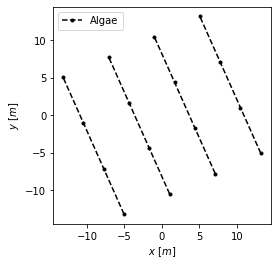

In [3]:
# make a plotter
def plot(walls):

    # make figure and axis
    fig, ax = plt.subplots(1)

    # plot walls
    for i, wall in enumerate(walls):
        label = 'Algae' if i == 0 else None
        ax.plot(wall[:,0], wall[:,1], 'k.--', label=label)

    # formatting and return
    ax.set_aspect('equal')
    ax.set_xlabel('$x~[m]$')
    ax.set_ylabel('$y~[m]$')
    ax.legend()
    return ax

ax = plot(walls)
plt.show()

In [7]:
# let's compute the orientation of the farm
def orientation(walls):

    # orientations
    ors = list()

    # loop through walls
    for wall in walls:
        
        # linearly fit 2D subspace and compute angle
        a, b = np.polyfit(wall[:,0], wall[:,1], deg=1)
        angle = np.arctan2(a, 1.0)
        ors.append(np.rad2deg(angle))

    # result
    return np.array(ors)


farm_angle = orientation(walls)
n_walls = len(farm_angle)
print('The farm has the orientations per wall: {}'.format(farm_angle))
farm_angle = farm_angle.mean()

The farm has the orientations per wall: [-66. -66. -66. -66.]


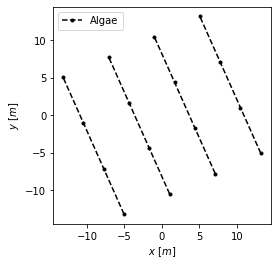

In [15]:
# Great! That seemed to work. 
# Now we will infer the walls,
# assuming that walls are maximal
# subsets.

# let's state the function we want
def line(points, theta, min_card=3, max_card=5, n_walls=4, etol=1e-4):

    # cardinality sanity
    assert points.shape[0] >= min_card
    assert points.shape[0] >= max_card

    # now we want to use a linear fit to infer the walls
    # so, let's consider points as a subset of R^3 
    # and compute the powerset with decreasing cardinality
    powerset = chain.from_iterable(
        combinations(points, r) for r in reversed(
            range(min_card, max_card + 1)
        )
    )

    # walls
    w = list()

    # loop through powerset with decreasing cardinality
    for s in powerset:

        # make array
        s = np.array(s)
        
        # fit a line through the subset's 2D subspace
        a, b = np.polyfit(s[:,0], s[:,1], deg=1)

        # compute angle error
        angle = np.arctan2(a, 1.0)
        e = (angle - np.deg2rad(theta))**2
        
        # pick lines that fit
        if e < 1e-4:
            w.append(s)

        # if we have all the walls
        if len(w) == n_walls:
            break

    return np.array(w)


infered_walls = line(points, farm_angle, min_card=3, max_card=5, n_walls=4, etol=1e-4)
ax = plot(infered_walls)
plt.show()


